In [13]:
from sklearn.datasets import load_breast_cancer 
from sklearn.datasets import load_diabetes 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.tree import plot_tree
import matplotlib.pylab as plt


dataset_cancer = load_breast_cancer()
print(dataset_cancer.feature_names)
print(dataset_cancer.target_names)

dataset_diabetes = load_diabetes()
print(dataset_diabetes.feature_names)
print(dataset_diabetes.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  4

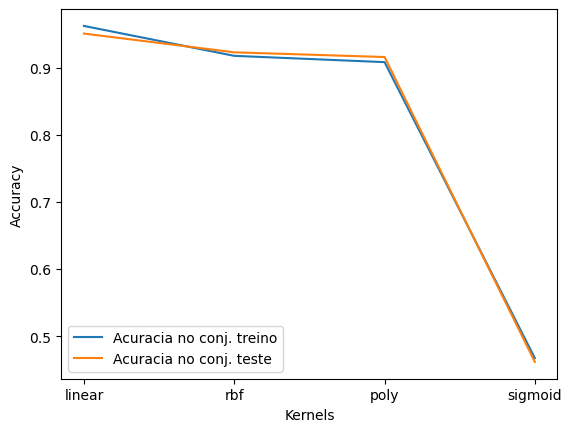

In [14]:
X_train_can, X_test_can, y_train_can, y_test_can = train_test_split(dataset_cancer.data, dataset_cancer.target, stratify=dataset_cancer.target, random_state=42)

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(dataset_cancer.data, dataset_cancer.target, stratify=dataset_cancer.target, random_state=42)
# Cria listas vazias para armazenar as acurácias nos conjuntos de treinamento e teste para diferentes kernels.
training_accuracy = []
test_accuracy = []

# Define uma lista de kernels que serão testados.
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Loop para testar diferentes kernels.
for kernel in kernels:
    # Cria um modelo SVM com o kernel atual.
    svm_model = svm.SVC(kernel=kernel)

    # Treina o modelo SVM com os dados de treinamento do conjunto de câncer de mama.
    svm_model.fit(X_train_can, y_train_can)
    
    # Calcula a acurácia do modelo nos dados de treinamento e a adiciona à lista de acurácias de treinamento.
    training_accuracy.append(svm_model.score(X_train_can, y_train_can))
    
    # Calcula a acurácia do modelo nos dados de teste e a adiciona à lista de acurácias de teste.
    test_accuracy.append(svm_model.score(X_test_can, y_test_can))

# Plota um gráfico para comparar as acurácias nos diferentes kernels.
plt.plot(kernels, training_accuracy, label='Acuracia no conj. treino')
plt.plot(kernels, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Accuracy')  # Rótulo do eixo vertical.
plt.xlabel('Kernels')   # Rótulo do eixo horizontal.
plt.legend()            # Adiciona uma legenda ao gráfico.

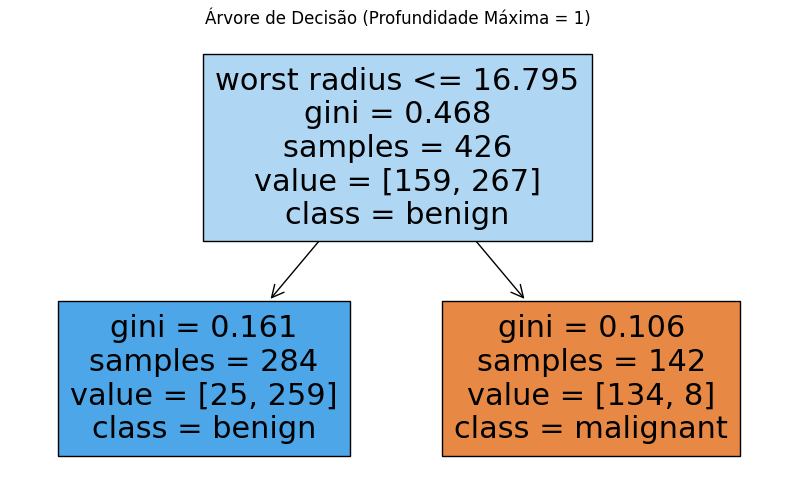

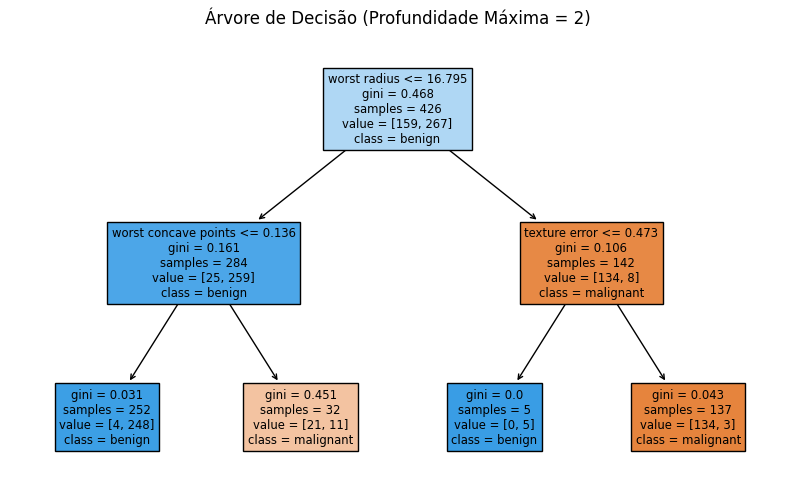

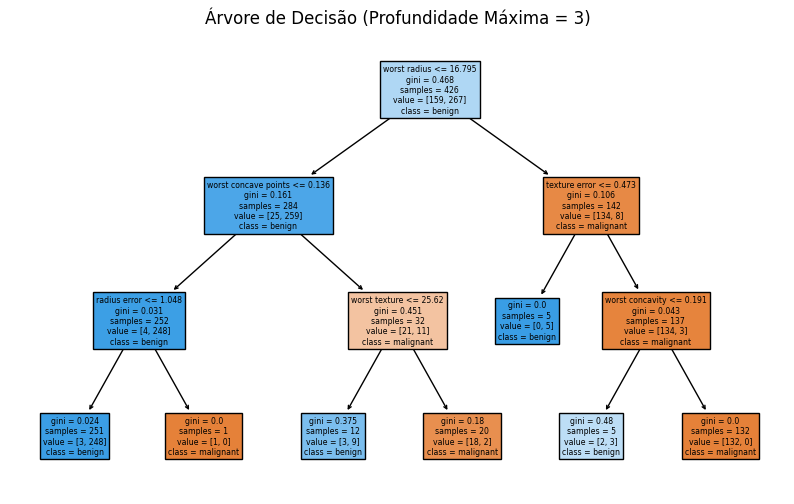

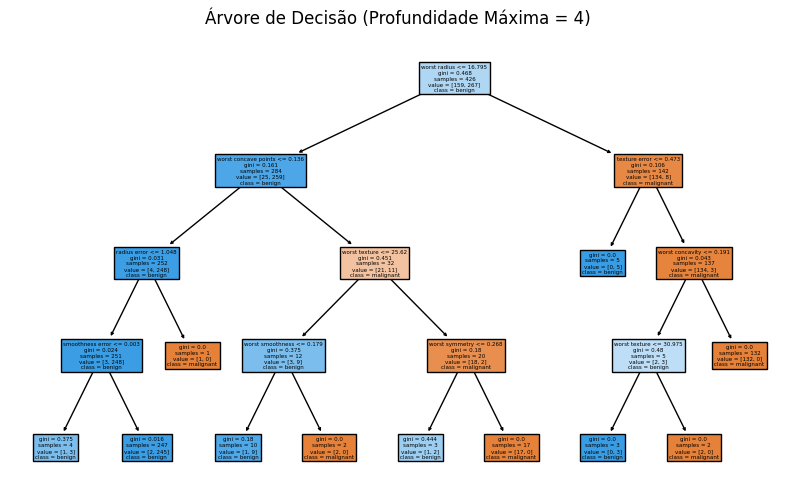

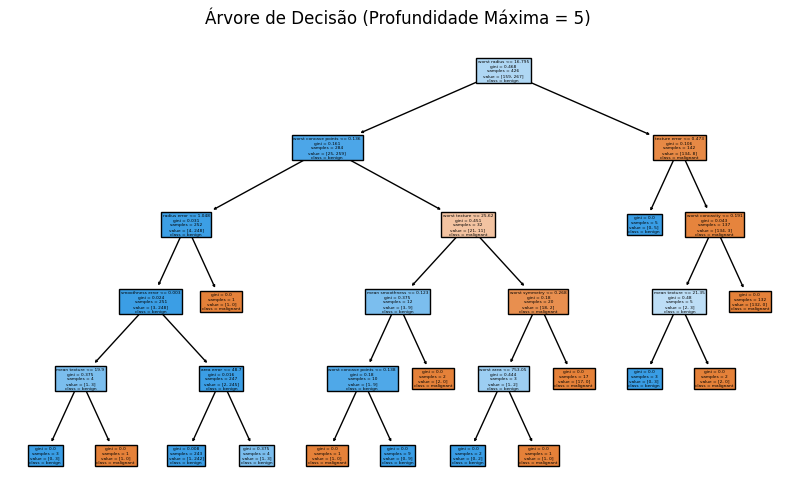

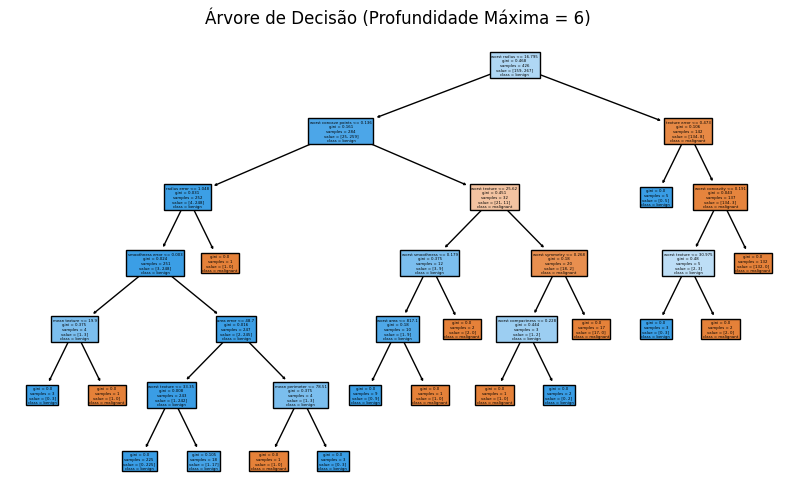

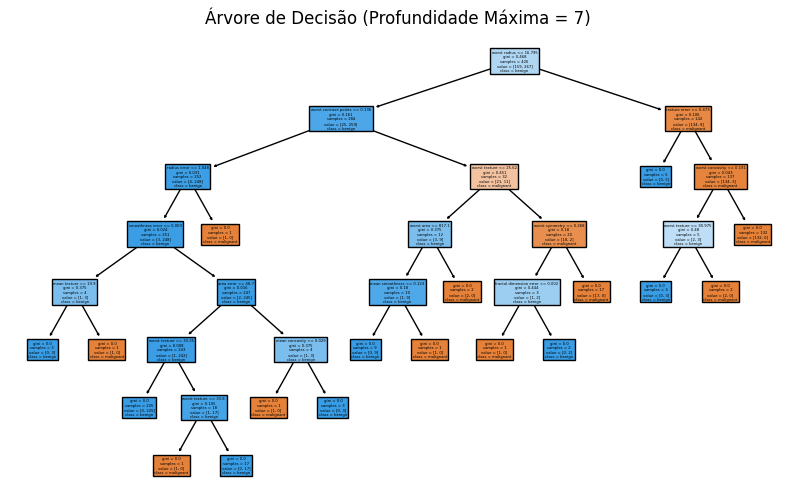

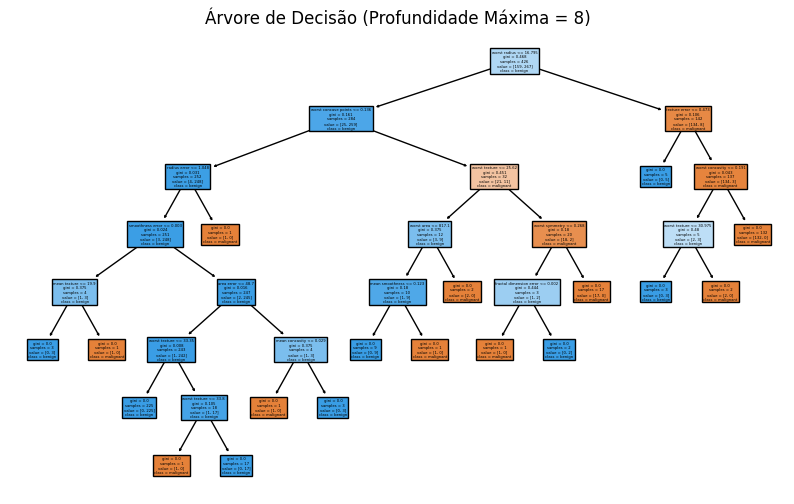

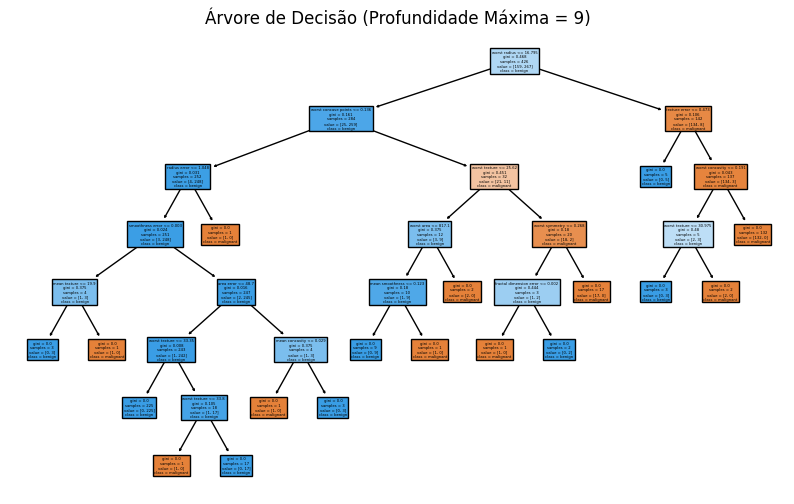

In [10]:
# Cria listas vazias para armazenar as acurácias nos conjuntos de treinamento e teste.
training_accuracy = []
test_accuracy = []

# Define um intervalo de profundidades máximas de 1 a 9.
prof_max = range(1, 10)

# Loop para testar diferentes profundidades máximas.
for md in prof_max:
    # Cria um modelo de Árvore de Decisão com a profundidade máxima definida no valor atual de 'md'.
    tree = DecisionTreeClassifier(max_depth=md, random_state=0)
    
    # Treina o modelo da Árvore de Decisão com os dados de treinamento do conjunto de câncer de mama.
    tree.fit(X_train_can, y_train_can)
    
    # Calcula a acurácia do modelo nos dados de treinamento e a adiciona à lista de acurácias de treinamento.
    training_accuracy.append(tree.score(X_train_can, y_train_can))
    
    # Calcula a acurácia do modelo nos dados de teste e a adiciona à lista de acurácias de teste.
    test_accuracy.append(tree.score(X_test_can, y_test_can))

    # Imprime a árvore de decisão para a profundidade atual.
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário.
    plot_tree(tree, filled=True, feature_names=dataset_cancer.feature_names, class_names=dataset_cancer.target_names)
    plt.title(f'Árvore de Decisão (Profundidade Máxima = {md})')
    plt.show()
        

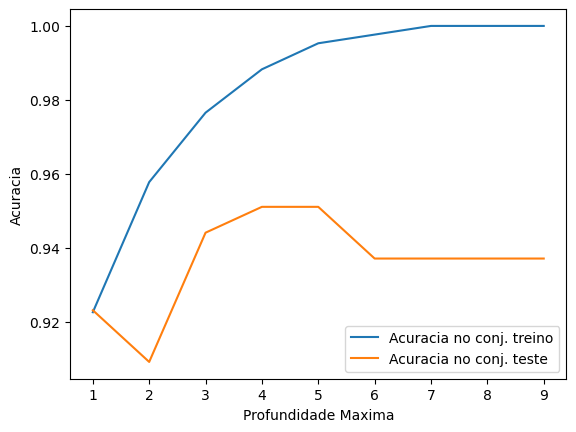

In [11]:

# Plota um gráfico para comparar as acurácias em diferentes profundidades máximas.
plt.plot(prof_max, training_accuracy, label='Acuracia no conj. treino')
plt.plot(prof_max, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')            # Rótulo do eixo vertical.
plt.xlabel('Profundidade Maxima')  # Rótulo do eixo horizontal.
plt.legend()                      # Adiciona uma legenda ao gráfico.


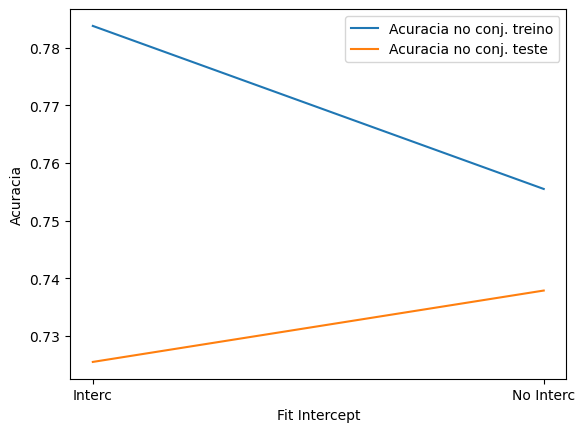

In [12]:
# Cria listas vazias para armazenar as acurácias nos conjuntos de treinamento e teste.
training_accuracy = []
test_accuracy = []

# Loop para testar a regressão linear com e sem interceptação.
for interception in [True, False]:
    # Cria um modelo de regressão linear com a opção de interceptação definida no valor atual de 'interception'.
    regr = LinearRegression(fit_intercept=interception)
    
    # Treina o modelo de regressão linear com os dados de treinamento do conjunto de diabetes.
    regr.fit(X_train_dia, y_train_dia)
    
    # Calcula o coeficiente de determinação R^2, que é uma medida de acurácia do modelo, nos dados de treinamento e o adiciona à lista de acurácias de treinamento.
    training_accuracy.append(regr.score(X_train_dia, y_train_dia))
    
    # Calcula o coeficiente de determinação R^2 nos dados de teste e o adiciona à lista de acurácias de teste.
    test_accuracy.append(regr.score(X_test_dia, y_test_dia))

# Plota um gráfico para comparar as acurácias com e sem interceptação nos conjuntos de treinamento e teste.
plt.plot(["Interc", "No Interc"], training_accuracy, label='Acuracia no conj. treino')
plt.plot(["Interc", "No Interc"], test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')          # Rótulo do eixo vertical.
plt.xlabel('Fit Intercept')     # Rótulo do eixo horizontal.
plt.legend()                    # Adiciona uma legenda ao gráfico.
